In [ ]:
!apt-get install libcairo2-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
The following packages will be upgraded:
  libblkid1 libmount1
2 upgraded, 15 newly installed, 0 to remove and 43 not upgraded.
Need to get 4,065 kB of archives.
Afte

In [ ]:
!pip install pycairo pkgconfig

In [ ]:
!pip install git+https://github.com/NeeravSreekumar/AD_Quantum

  Cloning https://github.com/NeeravSreekumar/AD_Demo to /tmp/pip-req-build-qfi5y2a1
  Running command git clone --filter=blob:none --quiet https://github.com/NeeravSreekumar/AD_Demo /tmp/pip-req-build-qfi5y2a1
  Resolved https://github.com/NeeravSreekumar/AD_Demo to commit c35e5bd658315c325a87fab220daebc2a6538a22
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 29.4 MB/s eta 0:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib
from alz-snqnet import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/act_new.csv'

Mounted at /content/drive


2024-04-05 19:16:24 | I | The dataframe genes are ordered
2024-04-05 19:16:24 | I | The observed probability `p_obs` is calculated
2024-04-05 19:16:24 | I | Activation ratios are computed
2024-04-05 19:16:24 | I | Plotting the Observed distribution in a barplot and exporting to 02_p_obs.svg file.
2024-04-05 19:16:24 | I | Theta series is initialized using zeros as method with activation values
2024-04-05 19:16:24 | I | Edges for the QuantumGRN and quantum circuit are created for 8 genes
2024-04-05 19:16:24 | I | The QuantumGRN model is been initialized with 8 genes and 1040 cells


NameError: name 'QuantumCircuit' is not defined

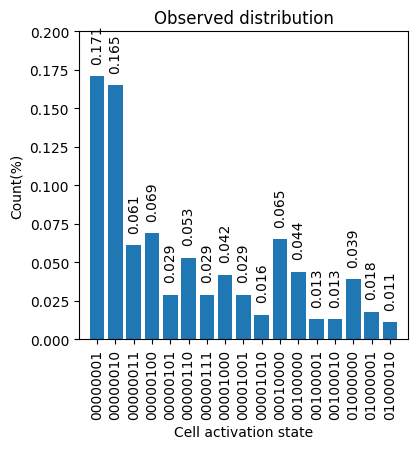

In [ ]:
import qiskit
from qiskit import QuantumCircuit
path = os.getcwd()
filename="/content/drive/MyDrive/act_new.csv"
df = pd.read_csv(os.path.join(path, filename))
df = df.set_index('Unnamed: 0').T
ncells, ngenes = df.shape
df = qsc_order_gene(df)
genes = df.columns.to_list()
p_obs = qsc_distribution(df)
activation = qsc_activation_ratios(df)

mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.20,
                 title="Observed distribution",
                 filename="02_p_obs.svg")

theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)

qgrn = model(ncells, genes, theta, edges, p_obs, epochs=1000)
qgrn.train()

qgrn.train()
p_out =qgrn.p_out.reshape(2**ngenes,)
p_qiskit = qgrn.run_qiskit(filename="02_qgrn_circuit.svg")

comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.20, mask=mask,
                filename="02_comparison_obs_out.svg", tags=["p^{obs}", "p^{out}"])

comparison_hist(ngenes, p_obs, p_qiskit, limit=0.01, ymax=0.20, mask=mask,
                filename="02_comparison_obs_qiskit.svg", tags=["p^{obs}", "p^{qiskit}"])

draw_network(genes, edges, qgrn.theta, filename="02_qgrn_network.svg")

In [ ]:
from google.colab import files
files.download("02_comparison_obs_out.svg")
files.download("02_comparison_obs_qiskit.svg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(qgrn.theta.to_string())

control  target
1        1         1.058265
         2         0.044794
         3         0.050884
         4         0.123109
         5        -0.054711
         6         0.044286
         7        -0.000519
         8         0.025685
2        1         0.044794
         2         1.044976
         3         0.174487
         4        -0.022467
         5        -0.025248
         6         0.002224
         7        -0.047362
         8        -0.078536
3        1         0.050884
         2         0.174487
         3         0.773622
         4        -0.050870
         5        -0.105563
         6        -0.066458
         7        -0.153903
         8         0.074156
4        1         0.123109
         2        -0.022467
         3        -0.050870
         4         0.562070
         5        -0.058445
         6        -0.060104
         7        -0.168851
         8        -0.019798
5        1        -0.054711
         2        -0.025248
         3        -0.105563
    

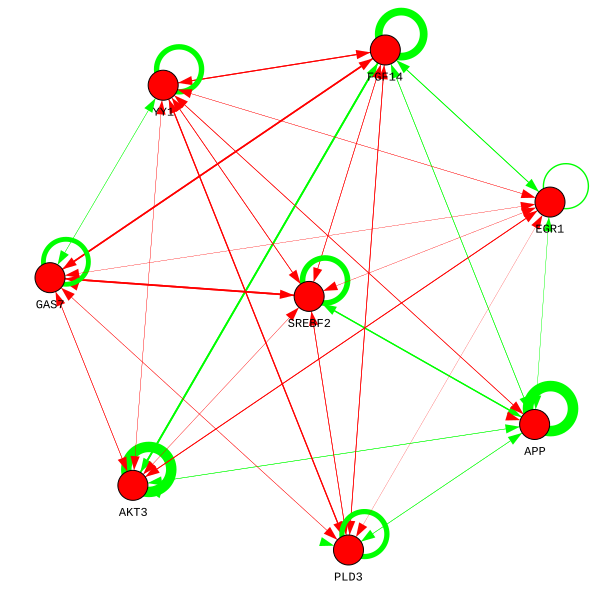

In [ ]:
import numpy as np
import igraph as ig
import pandas as pd

# Your provided data
data = pd.DataFrame({
    1: {1: 1.058265, 2: 0.044794, 3: 0.050884, 4: 0.123109, 5: -0.054711, 6: 0.044286, 7: -0.000519, 8: 0.025685},
    2: {1: 0.044794, 2: 1.044976, 3: 0.174487, 4: -0.022467, 5: -0.025248, 6: 0.002224, 7: -0.047362, 8: -0.078536},
    3: {1: 0.050884, 2: 0.174487, 3: 0.773622, 4: -0.050870, 5: -0.105563, 6: -0.066458, 7: -0.153903, 8: 0.074156},
    4: {1: 0.123109, 2: -0.022467, 3: -0.050870, 4: 0.562070, 5: -0.058445, 6: -0.060104, 7: -0.168851, 8: -0.019798},
    5: {1: -0.054711, 2: -0.025248, 3: -0.105563, 4: -0.058445, 5: 0.540032, 6: -0.112907, 7: 0.034236, 8: -0.029027},
    6: {1: 0.044286, 2: 0.002224, 3: -0.066458, 4: -0.060104, 5: -0.112907, 6: 0.524879, 7: -0.033177, 8: -0.011903},
    7: {1: -0.000519, 2: -0.047362, 3: -0.153903, 4: -0.168851, 5: 0.034236, 6: -0.033177, 7: 0.485128, 8: -0.019015},
    8: {1: 0.025685, 2: -0.078536, 3: 0.074156, 4: -0.019798, 5: -0.029027, 6: -0.011903, 7: -0.019015, 8: 0.138786}
})

# Gene mapping
gene_mapping = {
    1: 'APP',
    2: 'AKT3',
    3: 'FGF14',
    4: 'SREBF2',
    5: 'YY1',
    6: 'PLD3',
    7: 'GAS7',
    8: 'EGR1'
}

# Extracting unique genes and creating a list
genes = [gene_mapping[i] for i in data.columns]

# Extracting edges and converting them to tuples
edges = [(i, j) for i in data.index for j in data.columns]

# Creating a graph
g = ig.Graph(directed=True)

# Adding vertices with unique integer IDs and gene names as labels
for i, gene in enumerate(genes):
    g.add_vertex(name=gene, label=gene)

# Adding edges with weights based on theta values and curved set to 0.0
for i, j in edges:
    weight = np.abs(data.loc[i, j]) * 10  # Adjust multiplier as needed
    g.add_edge(g.vs.find(name=gene_mapping[i]).index, g.vs.find(name=gene_mapping[j]).index, weight=weight, curved=0.0)

# Creating layout coordinates for nodes (Fruchterman-Reingold layout)
layout = g.layout("fr")

# Plotting the graph

ig.plot(g, layout=layout, vertex_size=30, edge_width=g.es["weight"],
        edge_color=["red" if theta < 0 else "green" for theta in data.values.flatten()],
        vertex_label_size=12, vertex_label_color="black",
        vertex_label_dist=1.5, bbox=(600, 600), margin=50, target="your_output_file3.png")

In [ ]:
from google.colab import files
files.download("your_output_file3.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>